# 概要

* アタポンの1位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* イベント期間(h)を使って、ローカルレベル+時変係数モデルにしてみる

# インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

# イベントデータ読み込み

In [2]:
input_dir = './data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


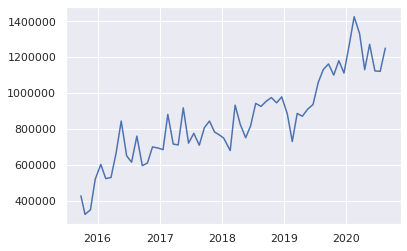

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

# stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準成分の推定値
  real<lower=0> s_t; // ev_lenの係数の変化を表す標準偏差
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63f10cc5788edc3d10735e32da228d2c NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmplfyo07b5\stanfit4anon_model_63f10cc5788edc3d10735e32da228d2c_6542269835285849218.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 24.6 s


In [8]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 32.3 s


In [11]:
# ファイル保存
save_dir = './data/'
with open(save_dir + 'c4_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c4_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


# 結果確認

In [12]:
fit

Inference for Stan model: anon_model_63f10cc5788edc3d10735e32da228d2c.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  1327.8  105.09  968.9 -453.6 674.01 1283.8 1921.0 3434.3     85   1.03
b_len[1]  1320.8  103.47 925.47 -305.0 687.31 1250.1 1855.0 3391.2     80   1.03
b_len[2]  1544.7   93.76 894.39 -100.7 946.06 1510.0 2081.6 3495.7     91   1.03
b_len[3]  1801.6   81.24 762.06 430.64 1299.4 1750.7 2260.1 3521.3     88   1.03
b_len[4]  2189.9   70.72 731.54  754.6 1715.6 2186.8 2641.3 3726.7    107   1.03
b_len[5]  2148.6   70.61 750.57 654.67 1659.2 2145.7 2602.5 3693.4    113   1.02
b_len[6]  2252.5   69.17 738.58 802.14 1774.7 2250.5 2708.0 3818.3    114   1.02
b_len[7]  2616.4   64.55 686.15 1219.8 2183.8 2610.9 3075.1 4026.0    113   1.02
b_len[8]  2888.1    63.7 649.59 1542.3 2480.3 2919.2 3326.5 4088.0    104   1.03
b

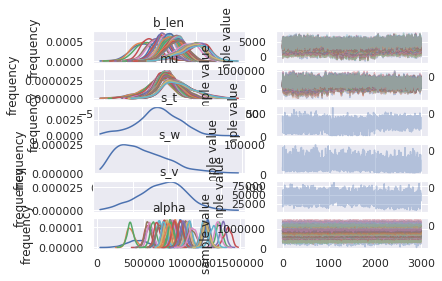

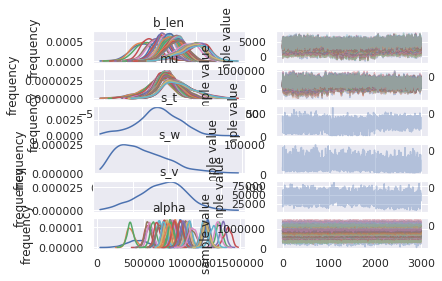

In [13]:
fit.plot()

In [14]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


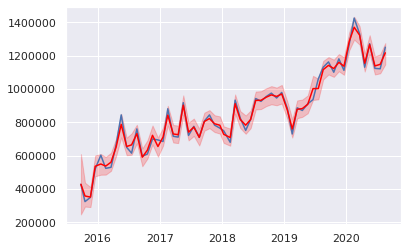

In [15]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

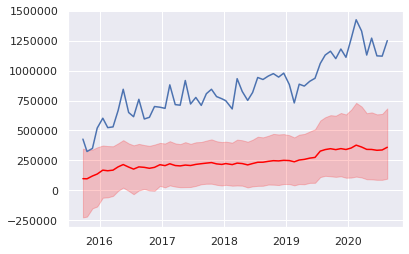

In [16]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

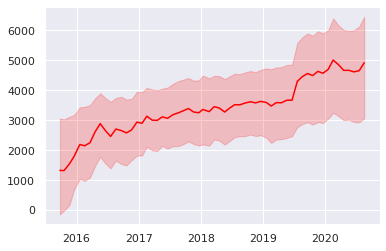

In [17]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_len_mean, c='red')
plt.fill_between(X, b_len_5, b_len_95, color='red', alpha=0.2)
plt.show()

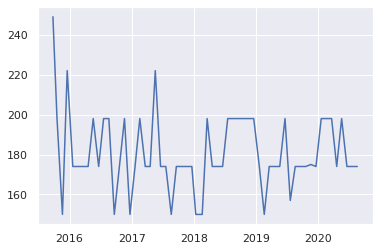

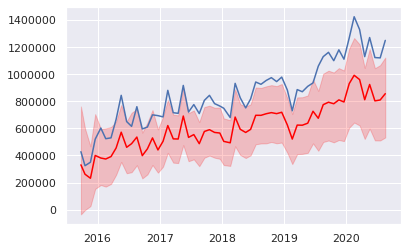

In [18]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['1位'], label='observed')
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

# 残差確認

In [19]:
df['predict'] = alpha_mean
# 予測とのズレ（比）
df['diff'] = df['1位'] - df['predict']
df.drop(['2001位', '形式', '属性'], axis=1, inplace=True)

In [20]:
df.head()

,イベント,1位,期間,predict,diff
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,249.0,428162.023189,-385.023189
2015-10-19,Nation Blue,324369,198.0,358013.385238,-33644.385238
2015-11-20,Orange Sapphire,350000,150.0,351649.490738,-1649.490738
2015-12-18,Snow Wings,520000,222.0,536227.470537,-16227.470537
2016-01-20,パステルピンクな恋,602529,174.0,549896.998994,52632.001006


In [21]:
# 残差の二乗の平均
"{:,}".format(((df['diff'])**2).sum() / len(df))

'648,768,422.5931731'

In [22]:
df.corr()

,1位,期間,predict,diff
1位,1.000000,0.100235,0.994470,0.274019
期間,0.100235,1.000000,0.102909,-0.002094
predict,0.994470,0.102909,1.000000,0.171505
diff,0.274019,-0.002094,0.171505,1.000000


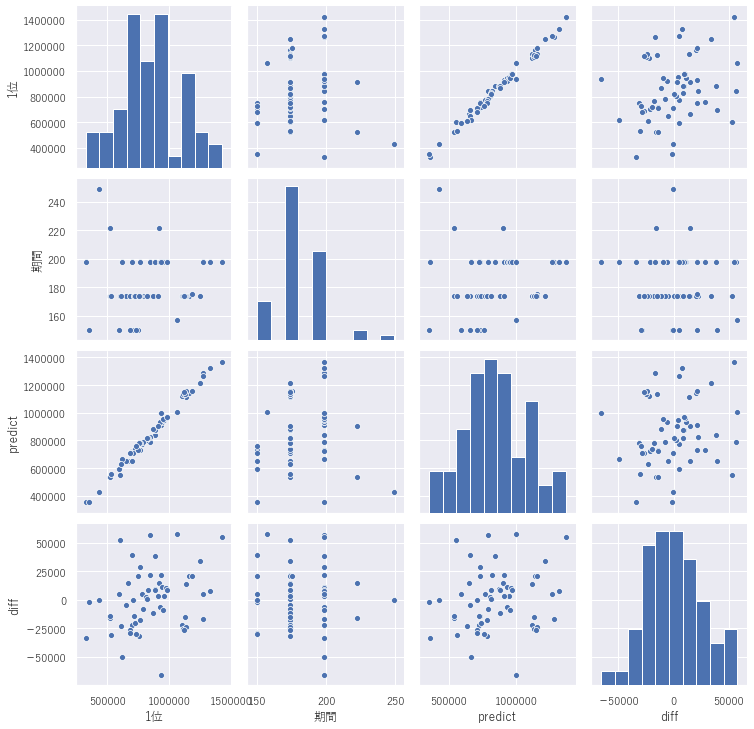

In [23]:
sns.set(font='Yu Gothic')
sns.pairplot(df)